In [67]:
import PyROA
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import os
import glob
import scienceplots
import sys
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../..'))
import rm_utils
import utils
np.random.seed(2) 
torch.manual_seed(2)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload

In [2]:
lcs = utils.get_data('../../datasets/ZTF_rm_segments/MCG+08-11-011', start_col=0,sep=' ', norm=False, shuffle=False, keep_missing=True)

found 1 for band='epoch5'
found 2 for band='epoch2'
found 2 for band='epoch3'
found 2 for band='epoch4'
found 2 for band='epoch1'
found 1 for band='epoch6'
found 3 for band='epoch0'
max time:  59353.164
created union_tp attribute of length 3500
dataset created, lcs.dataset.shape=(1, 7, 238, 3)
train size: 0, valid size: 0, test size: 1


In [3]:
lcs.valid_files_df

,epoch5,epoch2,epoch3,epoch4,epoch1,epoch6,epoch0
MCG+08-11-011,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...,../../datasets/ZTF_rm_segments/MCG+08-11-011/e...


In [29]:
epoch_dirs = glob.glob('../../datasets/ZTF_rm_segments/MCG+08-11-011/*/')
epoch_dirs.sort()
print(epoch_dirs, len(epoch_dirs))

filters = ["g","r"] 
objName = "MCG+08-11-011"
psi_types = ["LogGaussian"]


default = [[0.0, 20.0],[0.0, 100.0], [-50.0, 50.0], [0.01, 10.0], [0.0, 10.0]]
            # rms      # mean       # lag        # width of window  # extra error 
priors = [[0.0, 20.0], [0.0, 100.0], [-50.0, 50.0], [0.01, 10.0], [0.0, 10.0]]

inc_window = [[0.0, 20.0], [0.0, 100.0], [-50.0, 50.0], [10,30], [0.0, 10.0]]
 


['../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch0/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch1/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch2/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch3/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch4/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch5/', '../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch6/'] 7


In [ ]:
datadir, objName, filters, priors, init_tau = None, init_delta=1.0, 
delay_dist=False, add_var=True, sig_level = 4.0, Nsamples=10000, 
Nburnin=5000, include_slow_comp=False, slow_comp_delta=30.0, calc_P=False

In [ ]:
# default is gaussian? 
# more runs for convergence ? 
# larger window ? 
# different transfer ?

keep 5000 more samples 
nwalkers? 


In [ ]:
# self, datadir, objName, filters, priors, init_tau = None, init_delta=1.0,
#                  delay_dist=False , psi_types = None, add_var=True, sig_level = 4.0, 
#                  Nsamples=10000, Nburnin=5000, include_slow_comp=False, slow_comp_delta=30.0, 
#                  delay_ref = None, calc_P=False, AccDisc=False, wavelengths=None, 
#                  use_backend = False, resume_progress = False, plot_corner=False)

# Segment 1

Initial Parameter Values
      A0       B0    σ0       A1       B1    τ1    Δ1    σ1    Δ
--------  -------  ----  -------  -------  ----  ----  ----  ---
0.186751  15.1459  0.01  0.13315  14.3808     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:49<00:00, 69.09it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    5.38590  (+   0.55031 -   0.50784)


Best Fit Parameters
      A0       B0         σ0        A1       B1      τ1        Δ1         σ1       Δ
--------  -------  ---------  --------  -------  ------  --------  ---------  ------
0.185008  15.1469  0.0287383  0.128013  14.3789  5.3859  0.856247  0.0331151  5.4685


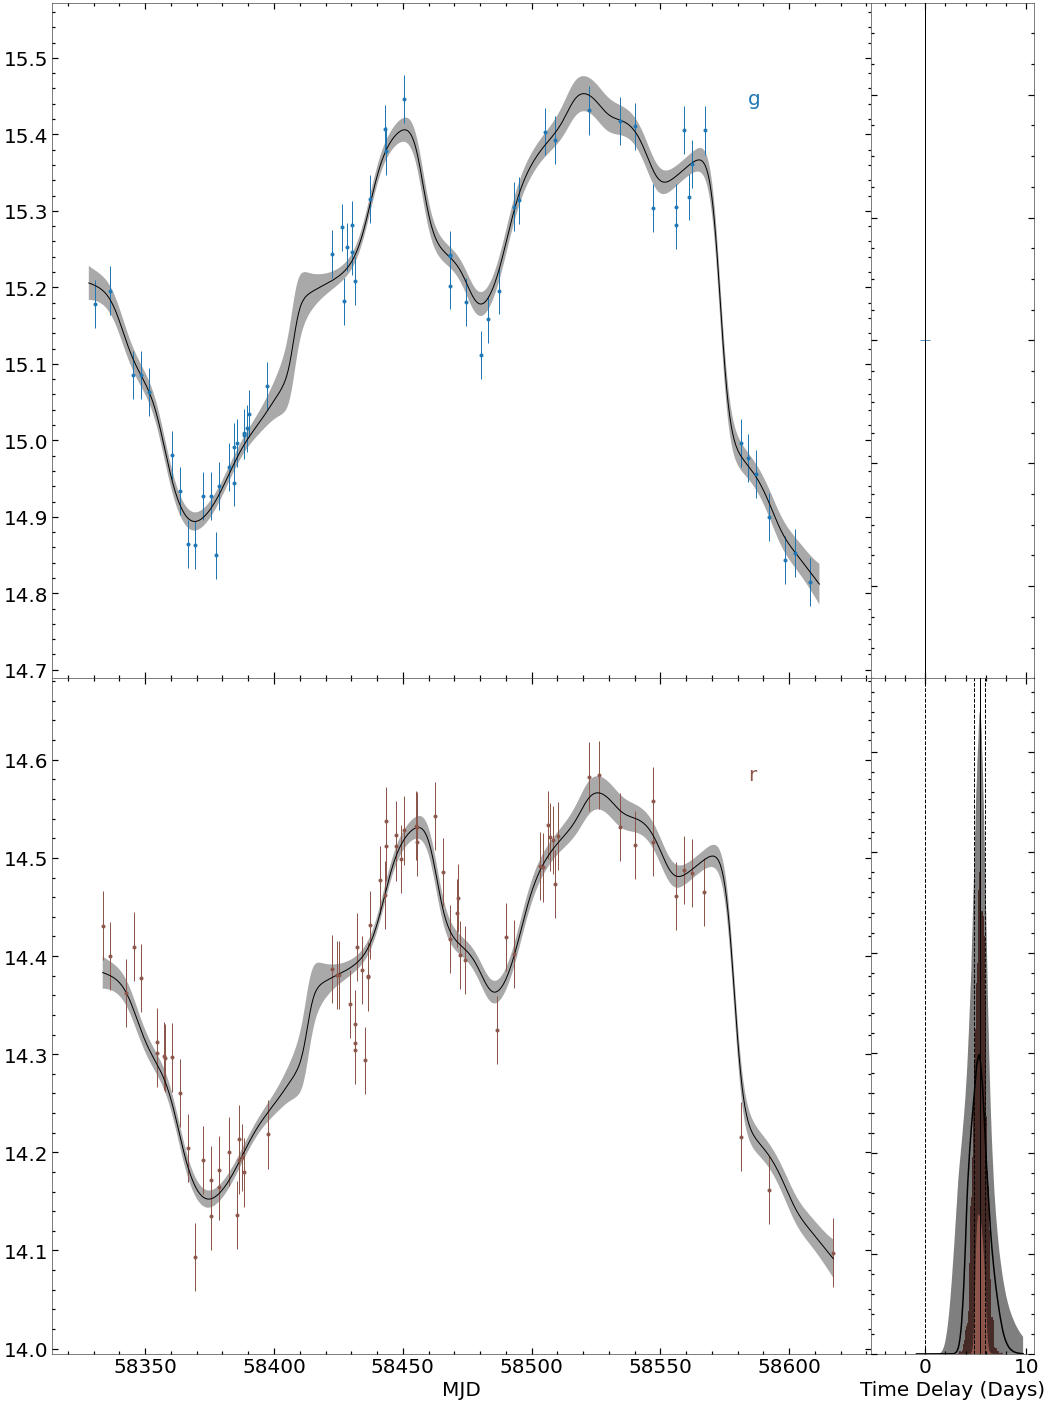

In [41]:
fit = PyROA.Fit(epoch_dirs[1], objName, filters, default, Nburnin=15000,Nsamples=20000, delay_dist=True, add_var=True, psi_types=psi_types,)# init_delta=20.0)
PyROA.Plot(fit)

Initial Parameter Values
      A0       B0    σ0       A1       B1    τ1    Δ1    σ1    Δ
--------  -------  ----  -------  -------  ----  ----  ----  ---
0.186751  15.1459  0.01  0.13315  14.3808     1     1  0.01   10
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:15<00:00, 73.69it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    5.68991  (+   0.85366 -   0.84307)


Best Fit Parameters
      A0       B0         σ0        A1       B1       τ1        Δ1         σ1        Δ
--------  -------  ---------  --------  -------  -------  --------  ---------  -------
0.182219  15.1477  0.0438018  0.124754  14.3784  5.68991  0.847555  0.0430051  10.0567


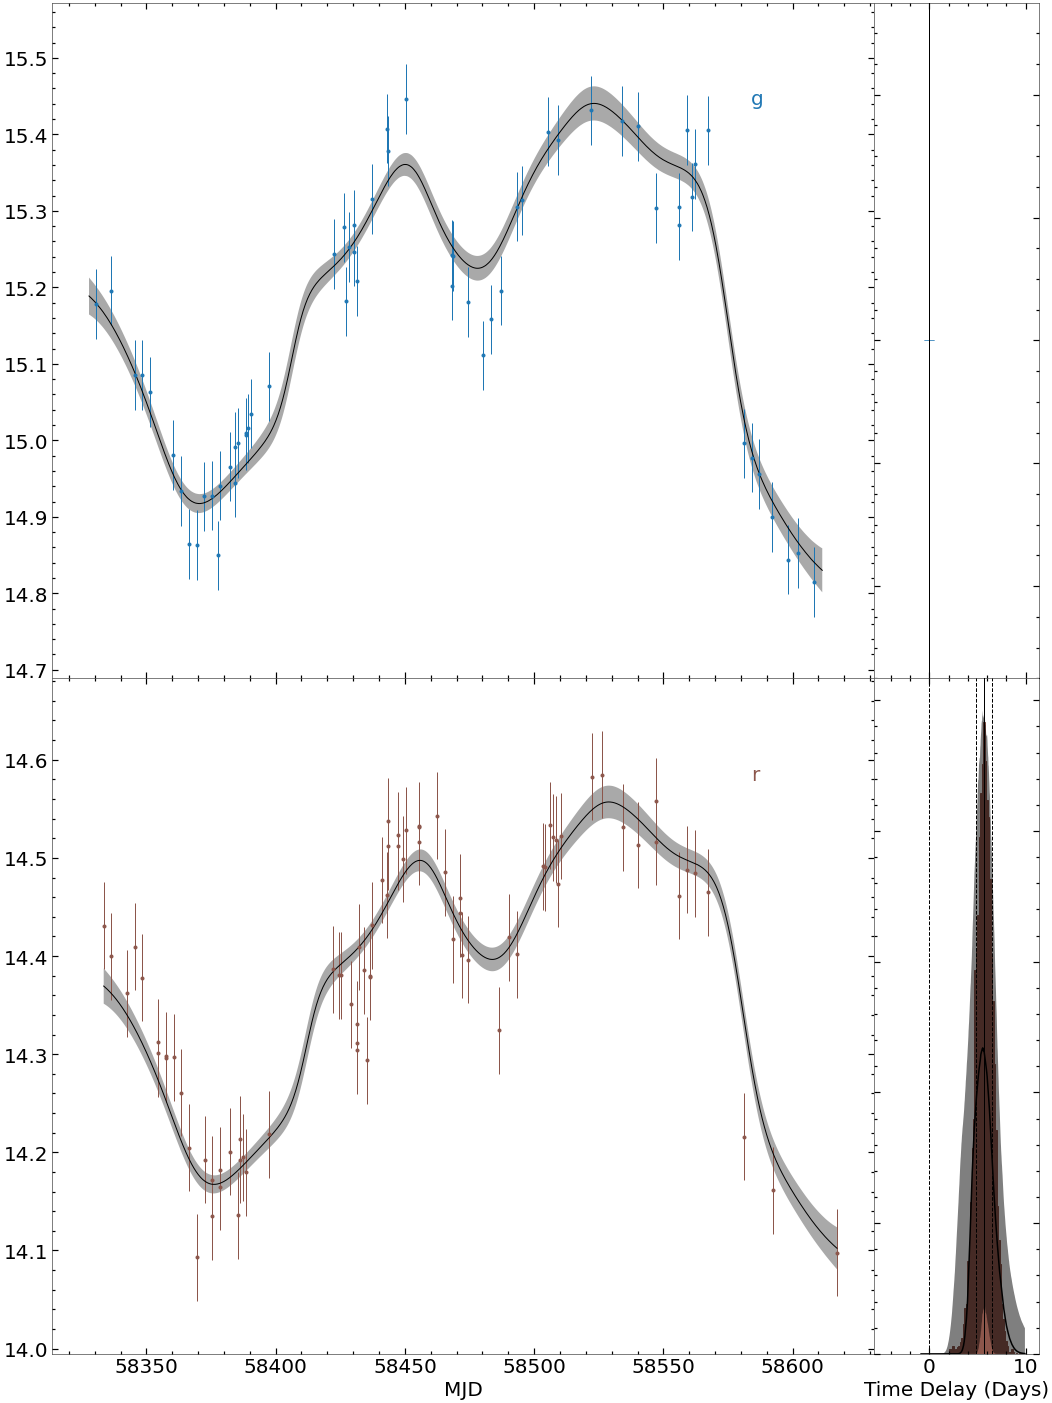

In [46]:
# increase window
priors = [[0.0, 20.0], [0.0, 100.0], [-50.0, 50.0], [5.0, 15.0], [0.0, 10.0]]
fit = PyROA.Fit(epoch_dirs[1], objName, filters, inc_window, init_delta=10, delay_dist=True, add_var=True, psi_types=psi_types,)# init_delta=20.0)
PyROA.Plot(fit)



# Segment 2

Initial Parameter Values
      A0       B0    σ0        A1      B1    τ1    Δ1    σ1    Δ
--------  -------  ----  --------  ------  ----  ----  ----  ---
0.285012  14.7931  0.01  0.203458  14.043     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:03<00:00, 54.40it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    1.60392  (+   0.33049 -   0.31116)


Best Fit Parameters
      A0       B0         σ0        A1       B1       τ1        Δ1         σ1        Δ
--------  -------  ---------  --------  -------  -------  --------  ---------  -------
0.282712  14.7923  0.0263198  0.202027  14.0445  1.60392  0.670525  0.0223145  3.12595


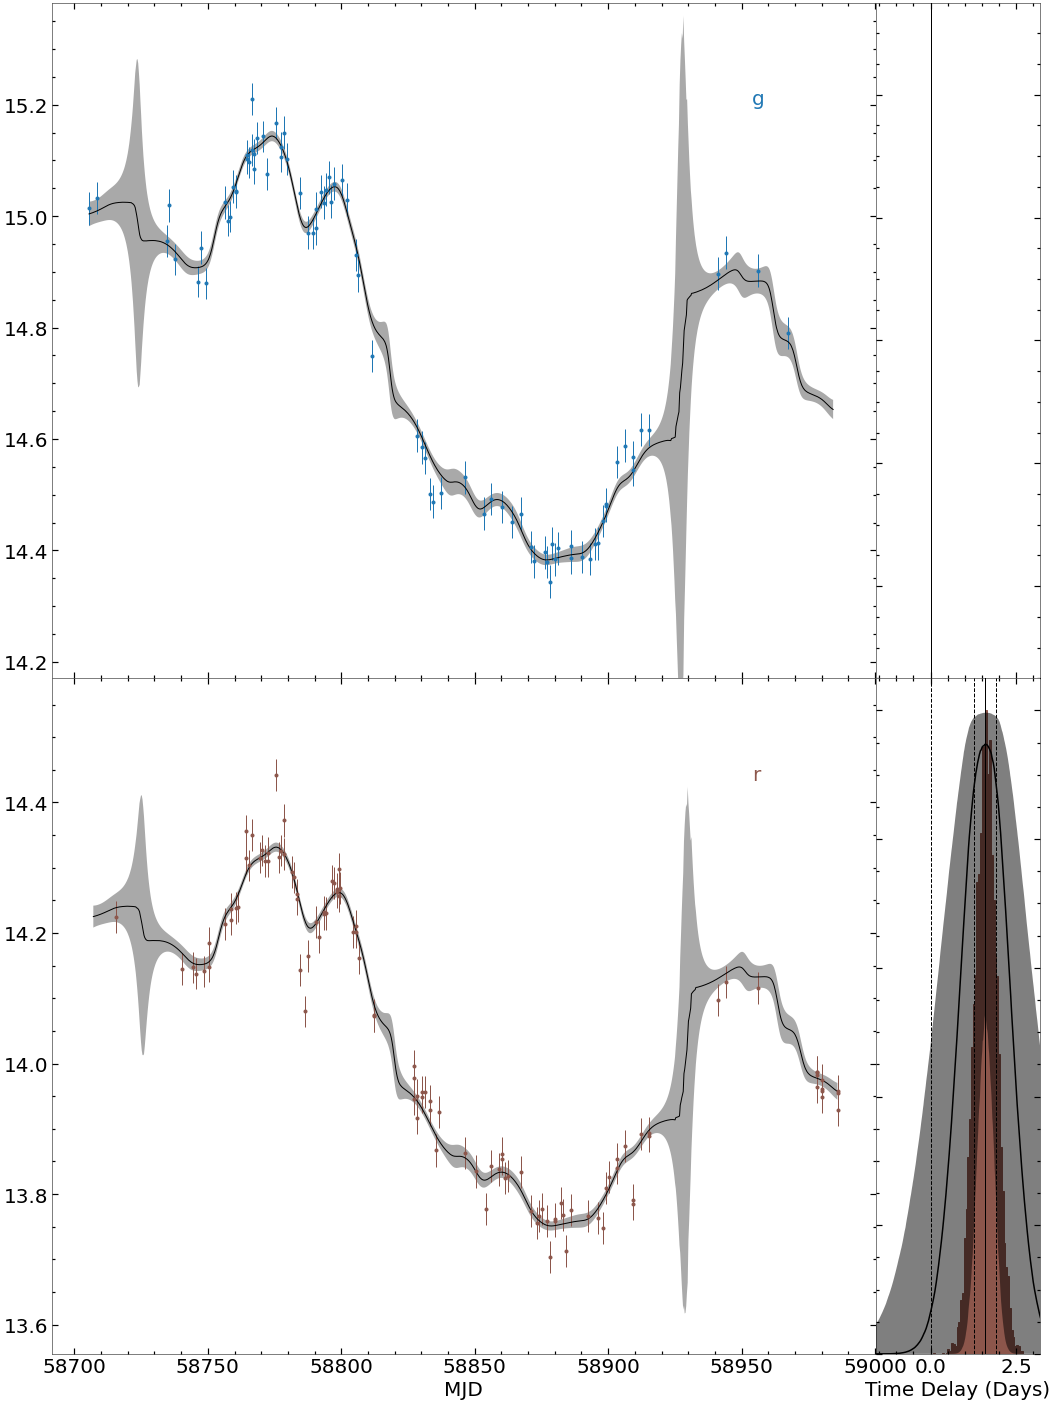

In [43]:
## defaults 
fit = PyROA.Fit(epoch_dirs[2], objName, filters, default, delay_dist=True, add_var=True,)
PyROA.Plot(fit)

Initial Parameter Values
      A0       B0    σ0        A1      B1    τ1    Δ1    σ1    Δ
--------  -------  ----  --------  ------  ----  ----  ----  ---
0.285012  14.7931  0.01  0.203458  14.043     1     1  0.01    1
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:12<00:00, 53.72it/s]


Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    1.59549  (+   0.30810 -   0.31204)


Best Fit Parameters
      A0       B0         σ0        A1       B1       τ1        Δ1         σ1        Δ
--------  -------  ---------  --------  -------  -------  --------  ---------  -------
0.282633  14.7922  0.0265464  0.202034  14.0444  1.59549  0.612914  0.0221476  3.12776


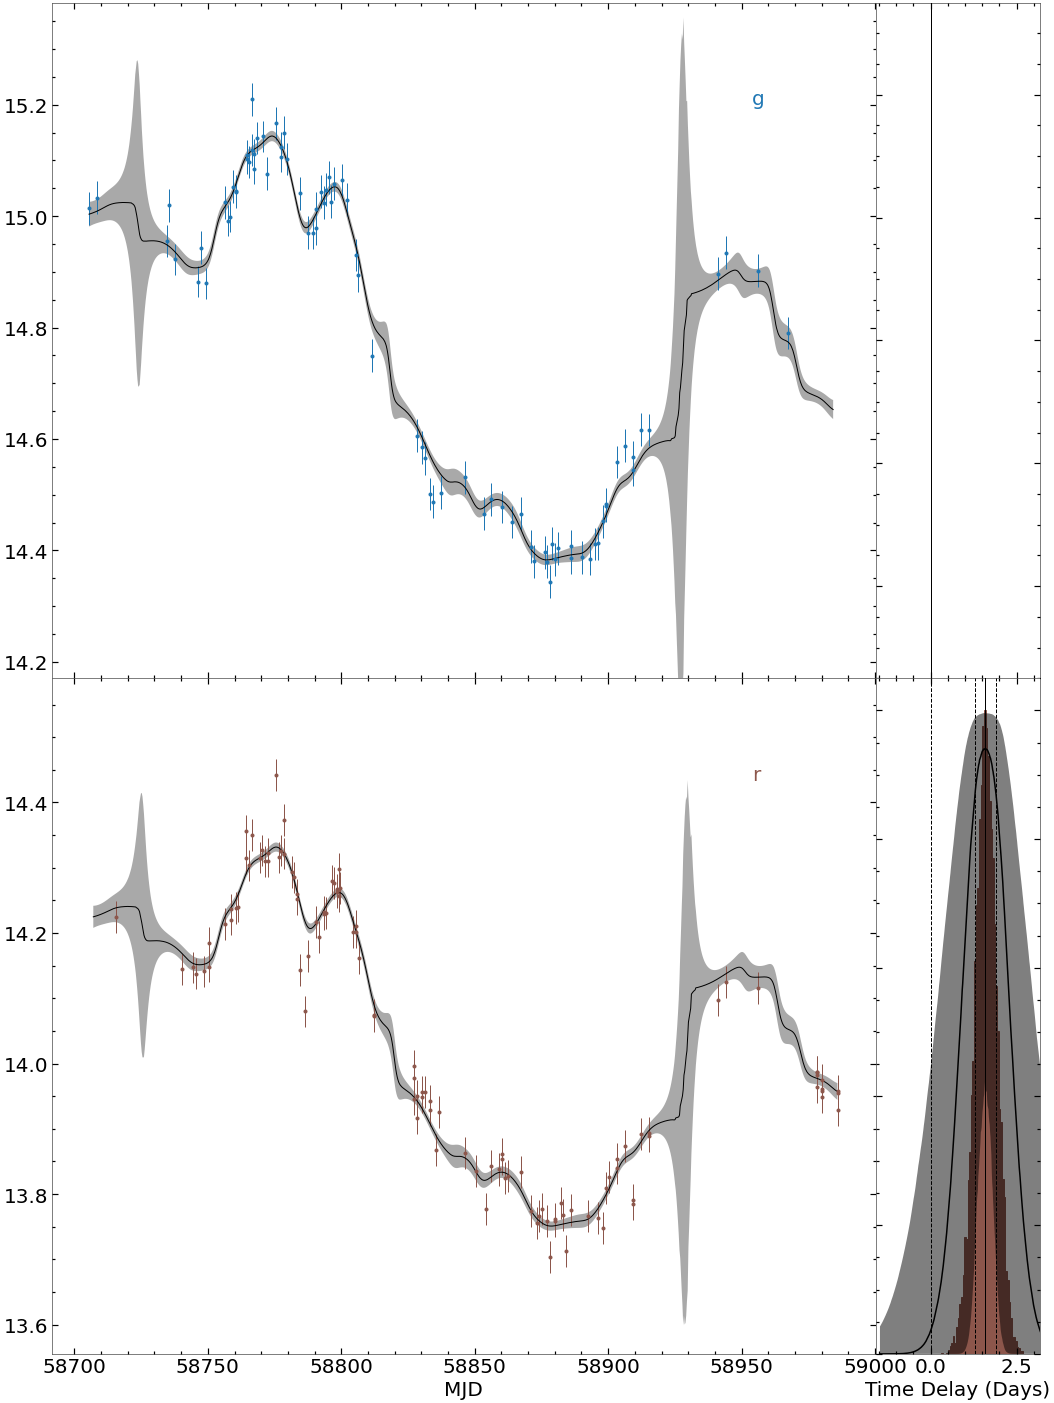

In [44]:
# increased burnin, nsamples  
fit = PyROA.Fit(epoch_dirs[2], objName, filters, default, delay_dist=True, add_var=True,Nburnin=15000, Nsamples=20000)
PyROA.Plot(fit)

Initial Parameter Values
      A0       B0    σ0        A1      B1    τ1    Δ1    σ1    Δ
--------  -------  ----  --------  ------  ----  ----  ----  ---
0.285012  14.7931  0.01  0.203458  14.043     1     1  0.01   10
NWalkers=22


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
  0%|                                                                                                                                                                             | 0/10000 [00:00<?, ?it/s]OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
100%|███████████████

Filter: g
Mean Delay, error: 0.00 (fixed)
Filter: r
Mean Delay, error:    1.61495  (+   0.31834 -   0.30251)


Best Fit Parameters
      A0       B0         σ0        A1       B1       τ1        Δ1         σ1        Δ
--------  -------  ---------  --------  -------  -------  --------  ---------  -------
0.282666  14.7921  0.0265837  0.201926  14.0445  1.61495  0.615884  0.0222129  3.11587


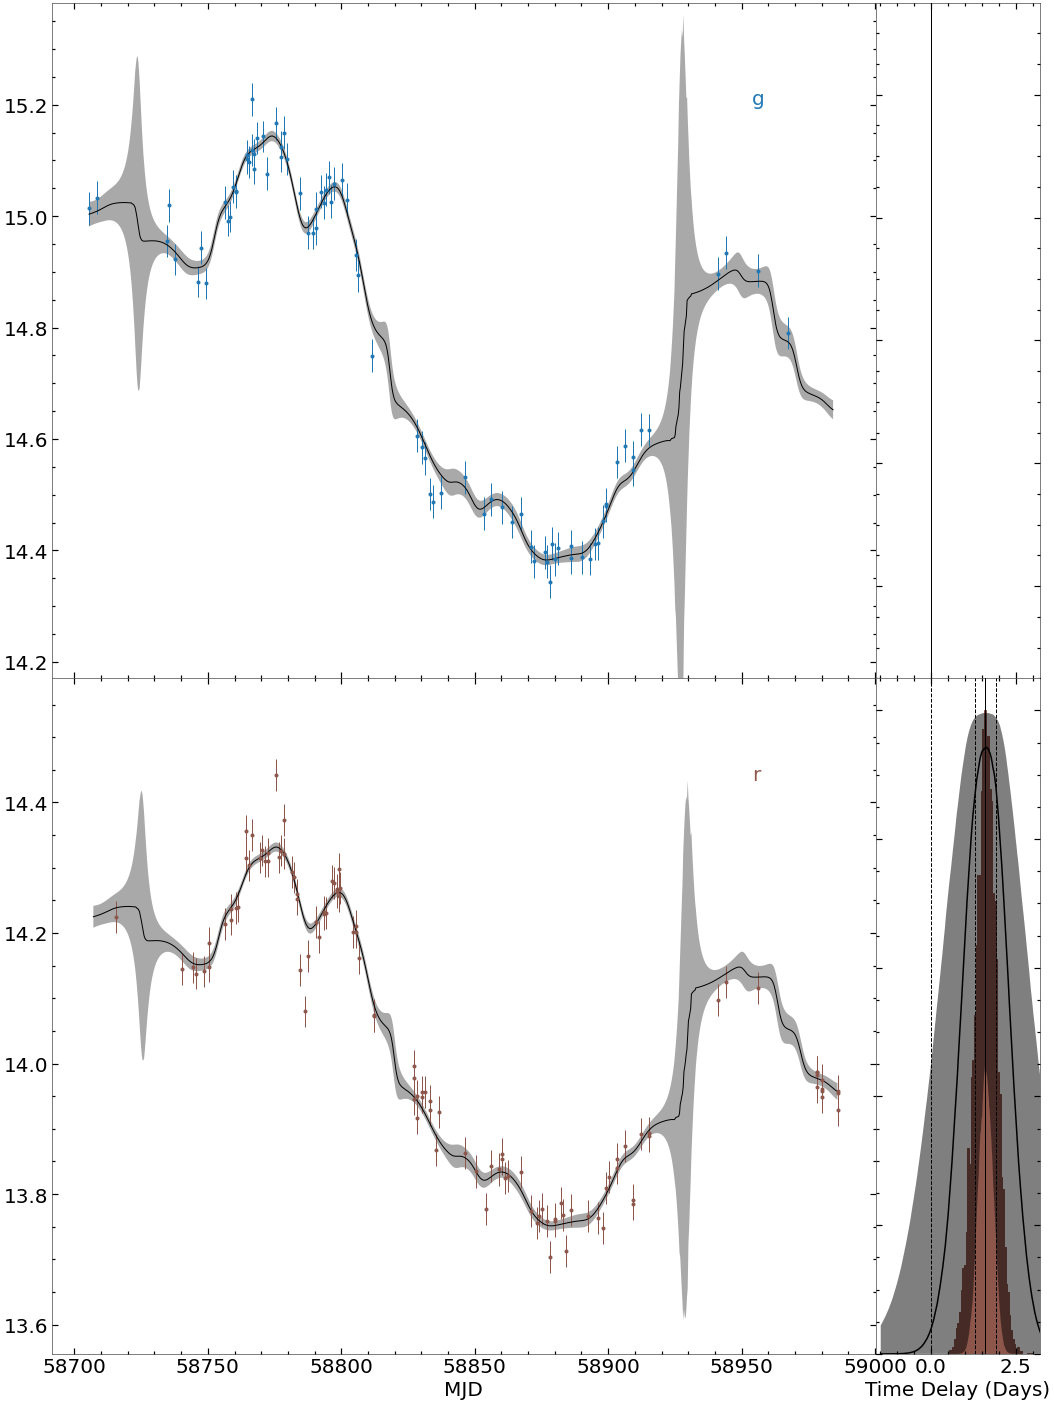

In [47]:
## bigger window 
priors = [[0.0, 20.0], [0.0, 100.0], [-50.0, 50.0], [5.0, 15.0], [0.0, 10.0]]
fit = PyROA.Fit(epoch_dirs[2], objName, filters, default, delay_dist=True, add_var=True,init_delta=10.0)
PyROA.Plot(fit)

In [51]:
epoch2_files = glob.glob(epoch_dirs[2]+'/*')

In [60]:
os.path.split(epoch_dirs[2])

('../../datasets/ZTF_rm_segments/MCG+08-11-011/epoch2', '')

In [64]:
linear_detrend(epoch_dirs[2],save=True)

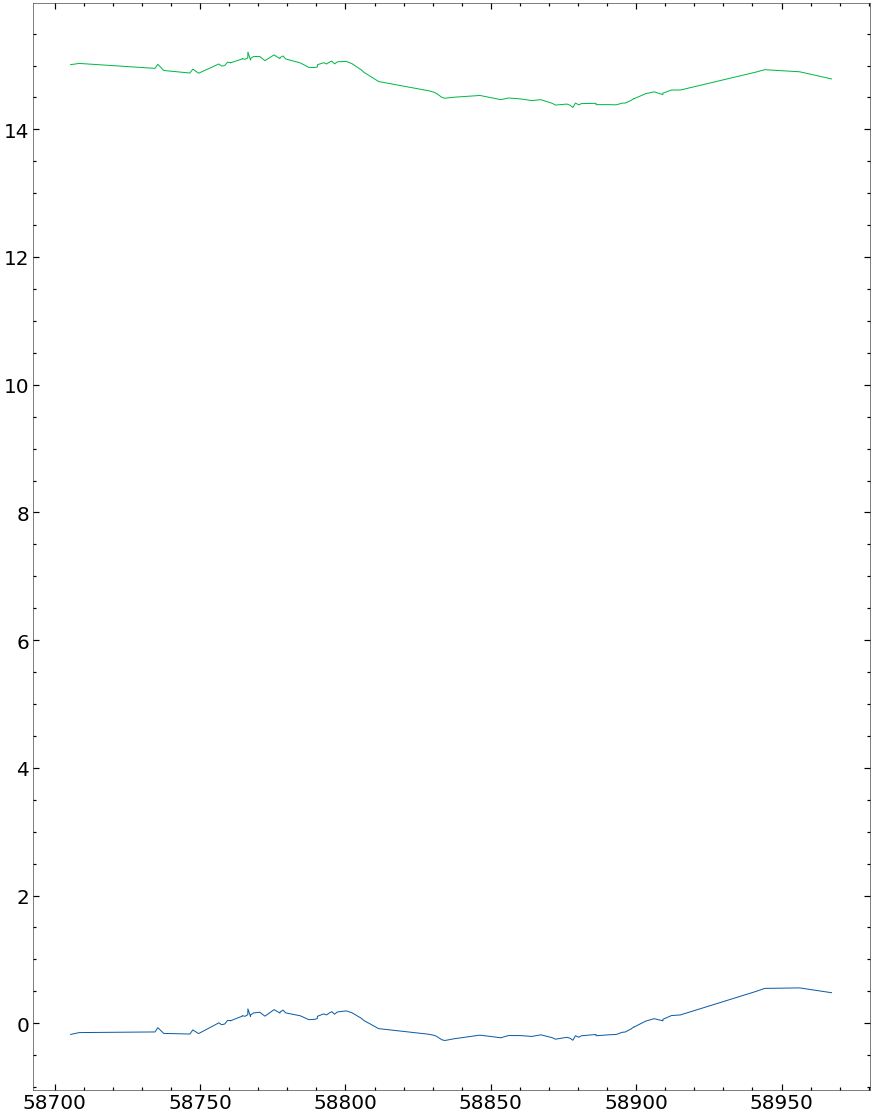

In [55]:
plt.plot(t, detrended)
plt.plot(t,y)